# Binary Classification: Regression Techniques

In [1]:
import pandas as pd
import numpy as np
from os import path
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn import metrics
from config import *
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv(path.join(DATA_DIR, TRAIN_PROC_FILE))
test_df = pd.read_csv(path.join(DATA_DIR, TEST_PROC_FILE))


op_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
op_df['PassengerId'] = test_df['PassengerId']

In [5]:
y = train_df['Survived']
X = train_df.drop(columns=['Survived'])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.35, random_state=20)

In [6]:
def probability_to_class_conversion(val):
    if val>0.5:
        return 1
    else:
        return 0

-------
### Linear Regression

Validation: Cross validated scores, Cross Predicted Accuracy

Score: Accuracy

Cross validated scores: [0.3575574  0.40584001 0.36231379 0.3842338  0.37577352]
Cross Predicted Accuracy: 0.34573553068343954
Confusion Matrix: 
 [[168  29]
 [ 38  77]]


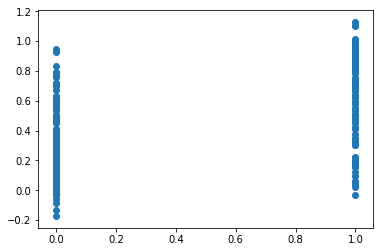

In [7]:
linear_classifier = LinearRegression()
linear_classifier.fit(X_train, y_train)

scores = cross_val_score(linear_classifier, X_train, y_train, cv=5)
print("Cross validated scores:", scores)

pred = cross_val_predict(linear_classifier, X_val, y_val, cv=5)

accuracy = metrics.r2_score(y_val, pred)
print("Cross Predicted Accuracy:", accuracy)

print("Confusion Matrix: \n", metrics.confusion_matrix(y_val, pd.Series(pred).apply(probability_to_class_conversion), labels=[0, 1]))
plt.scatter(y_val, pred)

In [8]:
test_pred = linear_classifier.predict(test_df)
op_df['Survived'] = pd.Series(test_pred).apply(probability_to_class_conversion)

op_df.to_csv(path.join(DATA_DIR, LINEAR_REG_PRED_FILE), index=None)

In [9]:
op_df['Survived'].value_counts()

0    256
1    162
Name: Survived, dtype: int64

### Accuracy: 77.511%

-------
### Logistic Regression

Validation: Cross validated scores, Cross Predicted Accuracy

Score: Accuracy

Cross validated scores: [0.79487179 0.81196581 0.80869565 0.79130435 0.79130435]
Cross Predicted Accuracy: 0.008430809975722875
Confusion Matrix: 
 [[167  30]
 [ 42  73]]


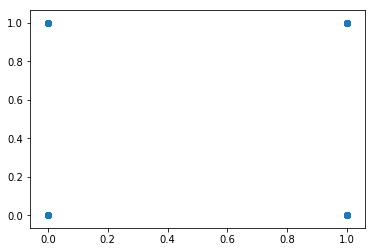

In [14]:
log_reg_classifier = LogisticRegression(C=1e2, solver='newton-cg', penalty='l2')
log_reg_classifier.fit(X_train, y_train)

scores = cross_val_score(log_reg_classifier, X_train, y_train, cv=5)
print("Cross validated scores:", scores)

pred = cross_val_predict(log_reg_classifier, X_val, y_val, cv=5)

accuracy = metrics.r2_score(y_val, pred)
print("Cross Predicted Accuracy:", accuracy)

print("Confusion Matrix: \n", metrics.confusion_matrix(y_val, pd.Series(pred).apply(probability_to_class_conversion), labels=[0, 1]))
plt.scatter(y_val, pred)


test_pred = log_reg_classifier.predict(test_df)
op_df['Survived'] = pd.Series(test_pred).apply(probability_to_class_conversion)

op_df.to_csv(path.join(DATA_DIR, LOG_REG_PRED_FILE), index=None)

In [15]:
op_df['Survived'].value_counts()

0    243
1    175
Name: Survived, dtype: int64

### Accuracy: 72.727%